#### Importing Relevant Packages

In [29]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas.plotting import autocorrelation_plot
sns.set()

#### Loading and Transforming the Data

In [14]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp["date"] = pd.to_datetime(df_comp["date"], dayfirst=True) 
df_comp.set_index("date", inplace=True)
df_comp = df_comp.fillna(method="ffill") 

#### Removing Surplus Data

In [15]:
df_comp["market_value"] = df_comp["spx"]

In [16]:
del df_comp["spx"], df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [17]:
df.tail()

,market_value
date,
2013-03-28,1569.185872
2013-03-29,1569.185872
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [18]:
df_test.head()

,market_value
date,
2013-04-04,1559.979316
2013-04-05,1553.278930
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827


#### White Noise

##### A sequence of random data, where every value has a time-period associated with it

In [19]:
wn = np.random.normal(loc=df["market_value"].mean(), scale = df["market_value"].std(), size=len(df))

In [20]:
df["wn"] = wn

C:\Users\cliente\AppData\Local\Temp\ipykernel_1812\617207721.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df.describe()

,market_value,wn
count,5015.000000,5015.000000
mean,1091.357559,1083.832096
std,292.487977,290.202799
min,438.920000,2.572257
25%,914.608917,892.446913
50%,1144.581490,1085.293874
75%,1315.996494,1281.378335
max,1570.252238,2035.934718


In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_comp.index, y=df["wn"],
            mode='lines',
            name="Normal Distribution"))

fig.update_layout(title_text="White Noise Time-Series", title_x=0.5,\
            xaxis_title='t', yaxis_title="Prices",\
            height = 400, width = 700, font={'size':10})

fig.show()

In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_comp.index, y=df["market_value"],
            mode='lines',
            name="White Noise Data"))
fig.update_layout(title_text="White Noise Time-Series", title_x=0.5,\
            xaxis_title='t', yaxis_title="Prices",\
            height = 400, width = 700, font={'size':10})


fig.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

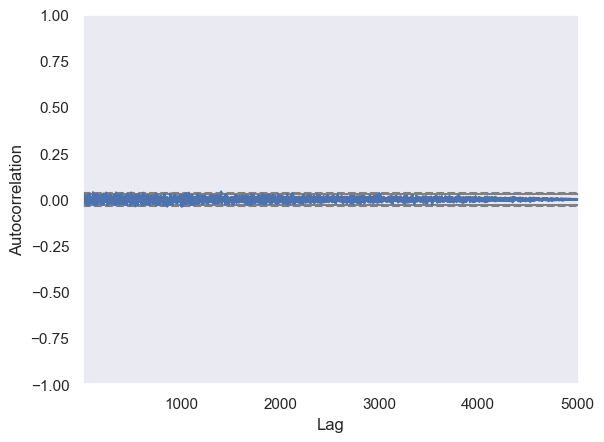

In [27]:
autocorrelation_plot(df["wn"])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

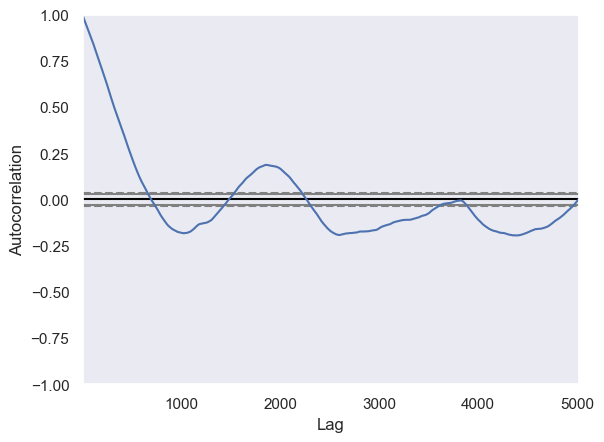

In [28]:
autocorrelation_plot(df["market_value"])

In [32]:
fig = px.histogram(data_frame=df, x='wn')
fig.update_layout(barmode='overlay', legend_title_text = "Data", title_text='White Noise Time-Series', title_x=0.5,\
            xaxis_title='t', yaxis_title="Prices",\
            height = 400, width = 700, font={'size':10})

In [33]:
fig = px.histogram(data_frame=df, x='market_value')
fig.update_layout(barmode='overlay', legend_title_text = "Data", title_text='White Noise Time-Series', title_x=0.5,\
            xaxis_title='t', yaxis_title="Prices",\
            height = 400, width = 700, font={'size':10})